<a href="https://colab.research.google.com/github/ShubhamZoro/Data-Science/blob/main/FatalForce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
death=pd.read_csv("Deaths_by_Police_US.csv",encoding='cp1252')

In [79]:
death.head()
print(death.shape)
death.isna().values.any()
death.dropna(inplace=True)
print(death.shape)
print(death.duplicated().values.any())
death.head()
death.sort_values(by=['state'],inplace=True)

(2254, 14)
(2254, 14)
False


In [108]:
manner_death=pd.DataFrame(death['manner_of_death'].value_counts())
manner_death
death_result=pd.DataFrame(death['state'].value_counts())

In [109]:

death_result.head()

,state
CA,366
TX,200
FL,136
AZ,105
OH,70


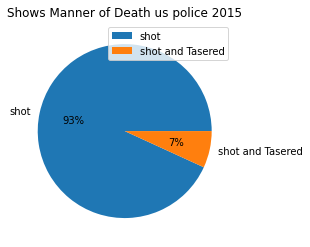

In [ ]:
labels=['shot','shot and Tasered']
plt.title('Shows Manner of Death us police 2015')
plt.pie(manner_death.manner_of_death,labels =labels,autopct='%1.0f%%')
plt.legend()

plt.show()

In [ ]:

death.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [ ]:
gender=pd.DataFrame(death['gender'].value_counts())
gender


,gender
M,2160
F,94


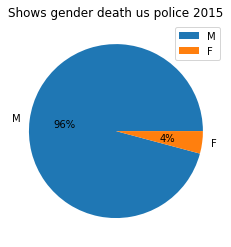

In [ ]:
sex=['M',"F"]
plt.title('Shows gender death us police 2015')
plt.pie(gender.gender ,labels=sex,autopct='%1.0f%%')
plt.legend()

plt.show()

In [ ]:

fig=px.bar(gender, x=sex, y='gender')
fig.show()

In [ ]:
threat=pd.DataFrame(death['threat_level'].value_counts())
threat.columns

Index(['threat_level'], dtype='object')

In [ ]:
x=['attack','undetermined','other']

fig=px.bar(threat, x=x, y='threat_level')
fig.show()

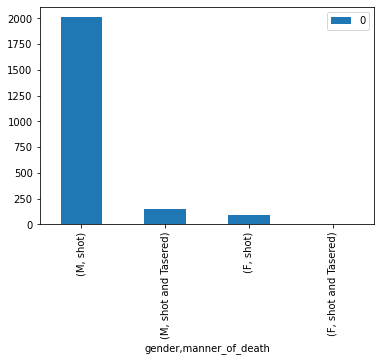

In [ ]:
gender=pd.DataFrame(death[['gender','manner_of_death']].value_counts())
gender.plot(kind='bar')


In [ ]:
race=death['race'].value_counts()
race.index

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [ ]:
x=['attack','undetermined','other']

fig=px.bar(race, x=race.index, y=race.values,color=race.index)

fig.show()

In [ ]:
state=pd.DataFrame(death[['state','race']].value_counts())
state=state.reset_index( level = [0 , 1] )
state.columns
state.head()

,state,race,0
0,CA,H,159
1,CA,W,122
2,TX,W,90
3,FL,W,68
4,CA,B,62


In [ ]:
fig=px.bar(x=state.race,y=state[0],labels=state.race,color=state.state)

fig.show()

***Median_Household_Income_2015.csv***

In [5]:
household=pd.read_csv("Median_Household_Income_2015.csv",encoding='cp1252')

In [ ]:
household.head()
household.shape

(29322, 3)

In [6]:
print(household.shape)
print(household.isna().values.any())
household.dropna(inplace=True)
print(household.duplicated().values.any())
print(household.shape)


(29322, 3)
True
False
(29271, 3)


In [ ]:
household.describe()

,Geographic Area,City,Median Income
count,29271,29271,29271
unique,51,24209,14592
top,PA,Franklin city,(X)
freq,1762,16,1113


In [ ]:
household.head()



str

In [7]:
household['Median Income'] =pd.to_numeric(household['Median Income'],errors='coerce')

In [8]:
result = household.groupby('Geographic Area')['Median Income'].aggregate('mean')
result.values
result.shape
result_frame=pd.DataFrame(result)
result_frame.head()

,Median Income
Geographic Area,
AK,52099.594406
AL,40577.309524
AR,35593.408915
AZ,42495.666667
CA,62097.352113


In [9]:
fig=px.bar(x=result.index,y=result.values,color=result.index,
           title="Average Income of People of Different Geographical location",
           labels=dict(x="Geographic Area", y="Average Income"))
fig.show()

In [ ]:
household.head()
household.shape

(27385, 3)

city with max income, city with min income, 

In [10]:
print(household[["Median Income","City","Geographic Area"]].max())
print(household[["Median Income","City","Geographic Area"]].min())
# household['Geographic Area'].value_counts()

Median Income         244083.0
City               Zwolle town
Geographic Area             WY
dtype: object
Median Income                              4511.0
City               Aaronsburg CDP (Centre County)
Geographic Area                                AK
dtype: object


**Pct_Over_25_Completed_High_School.csv**

In [11]:
high_school=pd.read_csv('Pct_Over_25_Completed_High_School.csv',encoding='cp1252')
high_school.head()
print(high_school.duplicated().values.any())

False


In [12]:
high_school.shape

(29329, 3)

In [ ]:

high_school.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [13]:
high_school.drop(high_school.index[high_school['percent_completed_hs'] == '-'], inplace=True)
high_school.shape

(29132, 3)

In [14]:
high_school['percent_completed_hs']=pd.to_numeric(high_school['percent_completed_hs'])
high_school.head()
# high_school['Geographic Area'].value_counts()Al-584
high_school[high_school['Geographic Area']=='AL']['percent_completed_hs'].sum()

46895.6

In [78]:
high_result = high_school.groupby('Geographic Area')['percent_completed_hs'].aggregate('mean')
high_result_frame=pd.DataFrame(high_result)
high_result_frame.head()

,percent_completed_hs
Geographic Area,
AK,84.627381
AL,80.300685
AR,79.949538
AZ,80.467117
CA,81.955430


In [ ]:
high_result.shape

(51,)

In [16]:
fig=px.bar(x=high_result.index,y=high_result.values,color=high_result.index,
           title="Average percent_completed_hs Different Geographical location",
           labels=dict(x="Geographic Area", y="Average percent_completed_hs"))
fig.show()

In [94]:
high_result_frame['Average Income']=result_frame['Median Income']

In [95]:
high_result_frame.head()

,percent_completed_hs,Death,Avg_pov_rate,Average Income
Geographic Area,,,,
AK,84.627381,14,19.852994,52099.594406
AL,80.300685,45,20.647089,40577.309524
AR,79.949538,20,22.963216,35593.408915
AZ,80.467117,105,25.666441,42495.666667
CA,81.955430,366,17.124650,62097.352113


In [ ]:
result_frame.head()

,Median Income
Geographic Area,
AK,52099.594406
AL,40577.309524
AR,35593.408915
AZ,42495.666667
CA,62097.352113


In [18]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
 

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(x=high_result_frame.index, y=high_result_frame.percent_completed_hs, name="percent_hs"),
    secondary_y=False)

fig.add_trace(
    go.Bar(x=high_result_frame.index, y=high_result_frame['Average Income'], name="Avg_income"),
    secondary_y=True,)

fig.update_layout(
    title_text="showing Average Income and Average Percent of people completing hs in an Area."
)

fig.update_xaxes(title_text="Geographic Area")
 

fig.update_yaxes(title_text="<b>Percent_completed_hs</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Average Income</b>", secondary_y=True)




By Avobe Graph we can say that the "NJ" has highest avergae income and highest percent of people completing high_school.

In [21]:
print(high_school[['percent_completed_hs','City','Geographic Area']].max())

percent_completed_hs          100.0
City                    Zwolle town
Geographic Area                  WY
dtype: object


In [22]:
print(high_school[['percent_completed_hs','City','Geographic Area']].min())

percent_completed_hs                               0.0
City                    Aaronsburg CDP (Centre County)
Geographic Area                                     AK
dtype: object


In [28]:
print(high_result_frame[['percent_completed_hs']].idxmax())
print(high_result_frame[['percent_completed_hs']].max())

percent_completed_hs    MA
dtype: object
percent_completed_hs    92.404082
dtype: float64


In [29]:
print(high_result_frame[['percent_completed_hs']].idxmin())
print(high_result_frame[['percent_completed_hs']].min())

percent_completed_hs    TX
dtype: object
percent_completed_hs    75.69
dtype: float64


***Pct_People_Below_Poverty_Level.csv***

In [31]:
poverty=pd.read_csv("Pct_People_Below_Poverty_Level.csv",encoding='cp1252')
poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [34]:
print(poverty.isna().values.any())
print(poverty.duplicated().values.any())

False
False


In [35]:
poverty.shape

(29329, 3)

(29128, 3)


<Figure size 720x480 with 0 Axes>

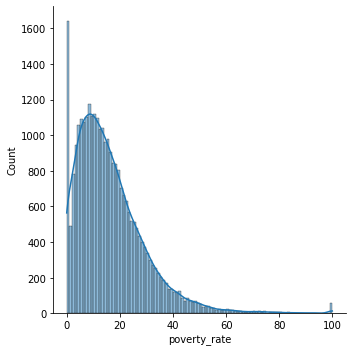

In [55]:
poverty.drop(poverty.index[poverty['poverty_rate'] == '-'], inplace=True)
print(poverty.shape)
poverty['poverty_rate']=pd.to_numeric(poverty['poverty_rate'])
poverty.head()
# high_school['Geographic Area'].value_counts()Al-584
plt.figure(dpi=120)
sns.displot(data=poverty, x="poverty_rate", kde=True )
plt.show()

In [41]:
poverty_mean = poverty.groupby('Geographic Area')['poverty_rate'].aggregate('mean')
poverty_frame=pd.DataFrame(poverty_mean)

In [44]:
poverty_frame.head()

,Avg_pov_rate
Geographic Area,
AK,19.852994
AL,20.647089
AR,22.963216
AZ,25.666441
CA,17.124650


In [47]:
poverty_frame.rename(columns = {'poverty_rate':'Avg_pov_rate'}, inplace = True)
poverty_frame.shape
poverty

(51, 1)

In [48]:
fig=px.bar(x=poverty_frame.index,y=poverty_frame.Avg_pov_rate,color=poverty_frame.index,
           title="Average poverty rate VS Geographic Area",
           labels=dict(x="Geographic Area", y="Average poverty rate"))
fig.show()

In [92]:
high_result_frame['Avg_pov_rate']=poverty_frame['Avg_pov_rate']

In [91]:
high_result_frame.head()

,percent_completed_hs,Death
Geographic Area,,
AK,84.627381,14
AL,80.300685,45
AR,79.949538,20
AZ,80.467117,105
CA,81.955430,366


In [51]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
 

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(x=high_result_frame.index, y=high_result_frame.percent_completed_hs, name="Avg_percent_hs"),
    secondary_y=False)

fig.add_trace(
    go.Bar(x=high_result_frame.index, y=high_result_frame['Avg_pov_rate'], name="Avg_Pov"),
    secondary_y=True,)

fig.update_layout(
    title_text="showing Average poverty and Average Percent of people completing hs in an Area."
)

fig.update_xaxes(title_text="Geographic Area")
 

fig.update_yaxes(title_text="<b>Percent_completed_hs</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Average Poverty</b>", secondary_y=True)




<function matplotlib.pyplot.show(*args, **kw)>

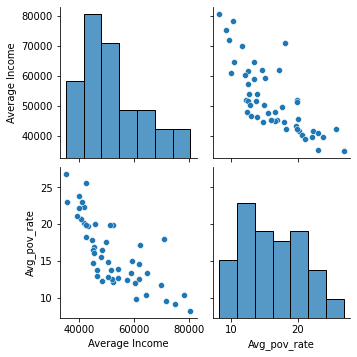

In [97]:
sns.pairplot(high_result_frame ,vars=["Average Income","Avg_pov_rate"])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

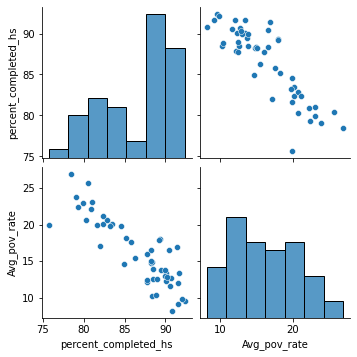

In [57]:
sns.pairplot(high_result_frame ,vars=["percent_completed_hs","Avg_pov_rate"])
plt.show

The above Graph Shows how imporatnt education is to reduce poverty

<Figure size 720x480 with 0 Axes>

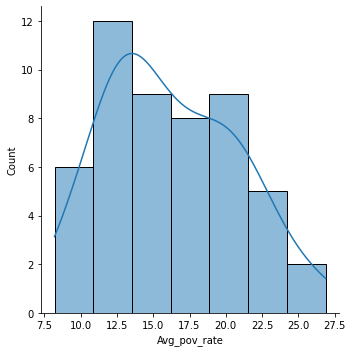

In [54]:
plt.figure(dpi=120)
sns.displot(data=high_result_frame, x="Avg_pov_rate", kde=True )
plt.show()

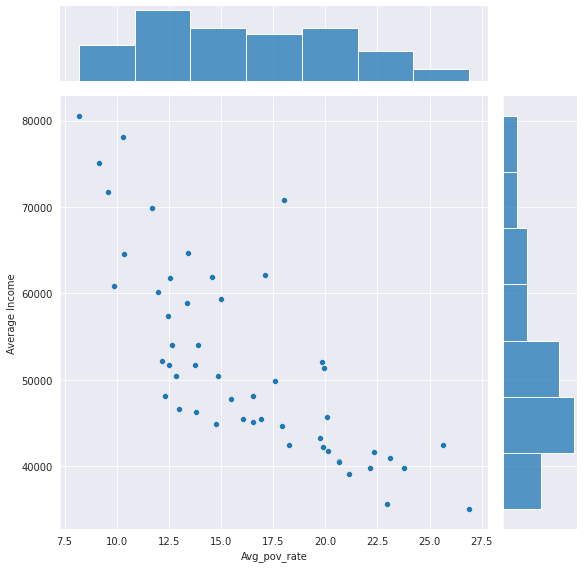

In [56]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=high_result_frame['Avg_pov_rate'], 
                y=high_result_frame['Average Income'], 
                height=8 
                )

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

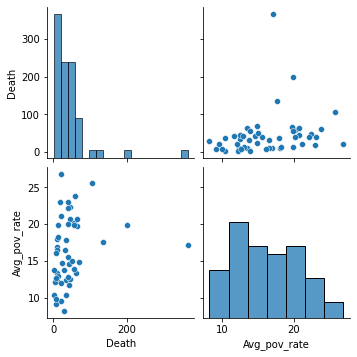

In [96]:
high_result_frame['Death']=death_result['state']
sns.pairplot(high_result_frame ,vars=["Death","Avg_pov_rate"])
plt.show

In [99]:
fig=px.bar(x=high_result_frame.index,y=high_result_frame.Death,color=high_result_frame.index,
           title="Death VS Geographic Area",
           labels=dict(x="Geographic Area", y="Death"))
fig.show()

In [110]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
 

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(x=high_result_frame.index, y=high_result_frame.percent_completed_hs, name="Avg_percent_hs"),
    secondary_y=False)

fig.add_trace(
    go.Bar(x=high_result_frame.index, y=high_result_frame['Death'], name="Death"),
    secondary_y=True,)

fig.update_layout(
    title_text="showing Death and Average Percent of people completing hs in an Area."
)

fig.update_xaxes(title_text="Geographic Area")
 

fig.update_yaxes(title_text="<b>Percent_completed_hs</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Death</b>", secondary_y=True)

***Share_of_Race_By_City.csv***

In [111]:
Race=pd.read_csv("Share_of_Race_By_City.csv")

In [113]:
Race.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [116]:
Race.isna().values.any()

False

In [117]:
Race.duplicated().values.any()

False

In [133]:
Race.drop(Race.index[Race['share_white'] == '(X)'], inplace=True)
Race.drop(Race.index[Race['share_black'] == '(X)'], inplace=True)
Race.drop(Race.index[Race['share_native_american'] == '(X)'], inplace=True)
Race.drop(Race.index[Race['share_asian'] == '(X)'], inplace=True)

Race.drop(Race.index[Race['share_hispanic'] == '(X)'], inplace=True)
print(Race.shape)
Race['share_white']=pd.to_numeric(Race['share_white'])
Race['share_black']=pd.to_numeric(Race['share_black'])
Race['share_native_american']=pd.to_numeric(Race['share_native_american'])
Race['share_asian']=pd.to_numeric(Race['share_asian'])
Race['share_hispanic']=pd.to_numeric(Race['share_hispanic'])
Race.head()

(29248, 7)


,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0.0,0.0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1.0,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0.0,0.1,0.4
4,AL,Akron town,13.2,86.5,0.0,0.0,0.3


In [134]:
Race_result = Race.groupby('Geographic area').aggregate('mean')
Final_frame=pd.DataFrame(Race_result)

In [137]:
Final_frame.head()
high_result_frame.columns

Index(['percent_completed_hs', 'Death', 'Avg_pov_rate', 'Average Income'], dtype='object')

In [138]:
Final_frame['Avg_pov_rate']=high_result_frame['Avg_pov_rate']
Final_frame['Death']=high_result_frame['Death']
Final_frame['percent_completed_hs']=high_result_frame['percent_completed_hs']
Final_frame['Average Income']=high_result_frame['Average Income']

In [139]:
Final_frame.head()

,share_white,share_black,share_native_american,share_asian,share_hispanic,Avg_pov_rate,Death,percent_completed_hs,Average Income
Geographic area,,,,,,,,,
AK,45.650000,0.567330,45.864773,1.388352,2.149148,19.852994,14,84.627381,52099.594406
AL,72.507266,23.322318,0.659343,0.479758,2.980104,20.647089,45,80.300685,40577.309524
AR,78.449538,16.296858,0.759889,0.477079,4.273013,22.963216,20,79.949538,35593.408915
AZ,59.929047,0.954545,28.589800,0.726608,20.144568,25.666441,105,80.467117,42495.666667
CA,71.866293,2.692018,1.723087,5.568206,29.649868,17.124650,366,81.955430,62097.352113


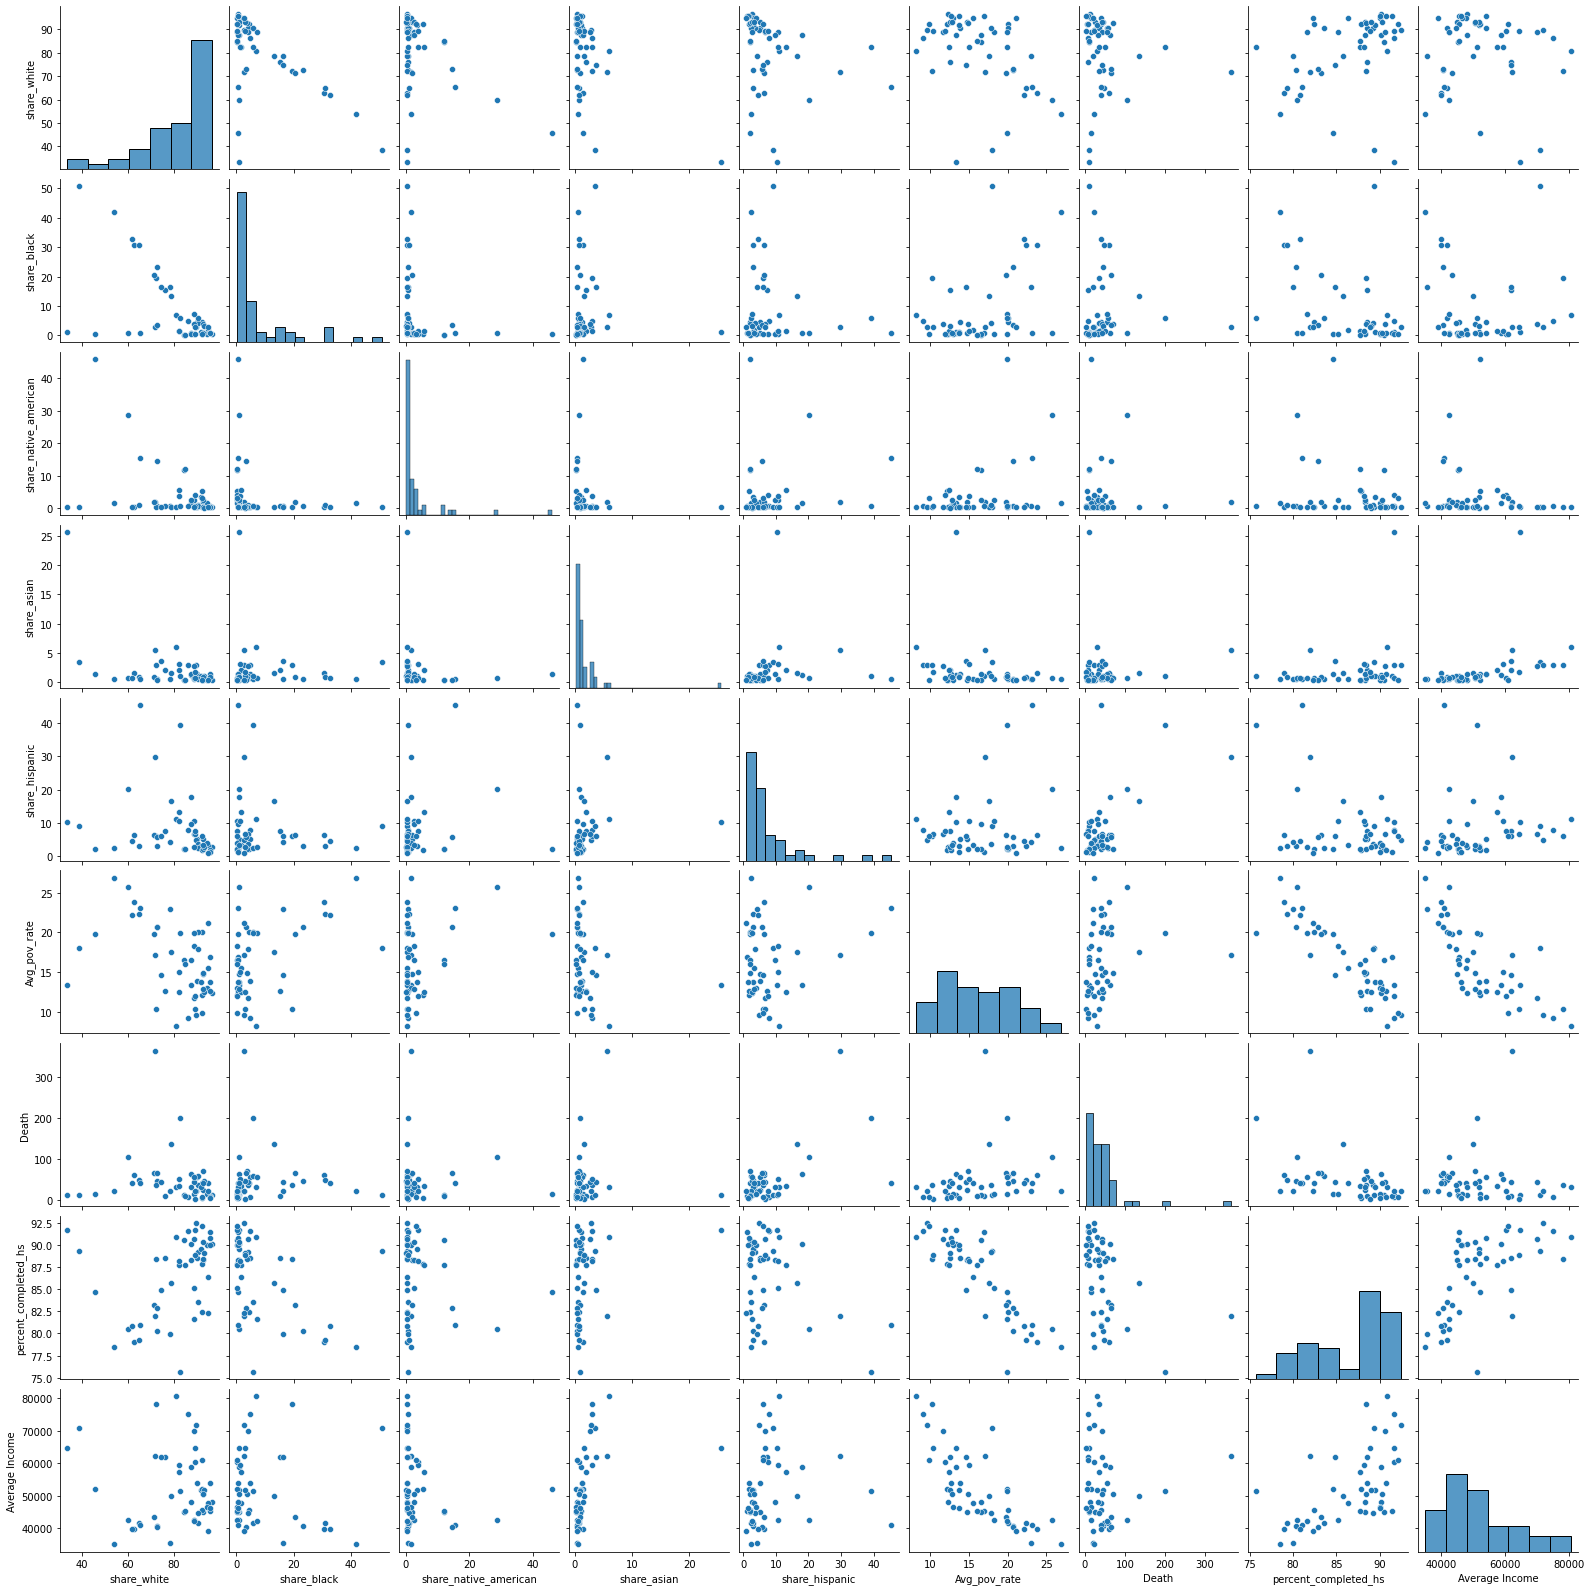

In [140]:
sns.pairplot(Final_frame)
plt.show()

<Figure size 720x480 with 0 Axes>

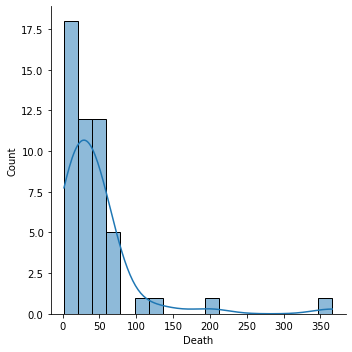

In [141]:
plt.figure(dpi=120)
sns.displot(data=Final_frame, x="Death", kde=True )
plt.show()

In [144]:

Final_frame.to_csv('Final_frame.csv')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
